In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class LogisticRegression:
    
    """Logistic regression for simple 2 classification problems."""
    
    def __init__(self, l):
        rnd = np.random.RandomState(123)
        self.l = l
        
        self.W = rnd.normal(0, 1, 2)
        self.w0 = rnd.normal(0, 1, 1)
        
        # two lists for keeping track of 
        # all updated weights and biases
        self.weights = []
        self.biases = []
        
        self.errs = []

    def train(self, X, T, max_steps=3, n_similar_loss=20):
        for step in range(max_steps):
            if self.__iter_over_data(X, T, n_similar_loss): 
                break

    def predict(self, x):
        return self.__sigmoid(self.W.T.dot(x) + self.w0).round()[0]
        
    def predict_all(self, y_train):
        return np.array([self.predict(y) for y in y_train])
    
    def score(self, y_train, y_test):
        return np.sum((self.predict_all(y_train) == y_test)) / len(y_train)
    
    def __iter_over_data(self, X, T, n_similar_loss):
        for x, t in zip(X, T):
            pred = self.__sigmoid(self.W.T.dot(x) + self.w0)[0]
            loss = self.__loss(pred, t)

            past_loss_dif = np.array(self.errs[-n_similar_loss:]) - loss
            
            if len(self.errs) < n_similar_loss:
                pass
            elif (np.all(past_loss_dif > 0) 
                  and 
                  np.all(past_loss_dif < 0.2)):
                return True
            
            self.errs.append(loss)
            self.__grad(x, pred, t)
    
    def __loss(self, y, t):
        return -(t * np.log(y) + (1 - t) * np.log(1 - y))
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __grad(self, x, predict, target):
        self.weights.append(self.W.copy())
        self.biases.append(self.w0.copy())
        self.w0 -= self.l * (predict - target)
        self.W -= self.l * (predict - target) * x

In [4]:
rand = np.random.RandomState(110)
c0 = rand.normal(2, 0.8, size=(200, 2))
c1 = rand.normal(4, 0.8, size=(200, 2))

X = np.concatenate((c0, c1))
y = np.hstack((np.zeros(len(c0)), np.ones(len(c1))))

shuffle_mask = np.arange(len(y))
rand.shuffle(shuffle_mask)

X = X[shuffle_mask]
y = y[shuffle_mask]

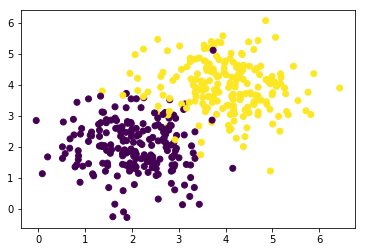

In [5]:
plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y);

In [6]:
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [7]:
log_reg = LogisticRegression(0.2)
log_reg.train(X_train, X_test, n_similar_loss=15)

log_reg.score(y_train, y_test)

0.9666666666666667

[0.4521412029262928, 6.291480802075776]

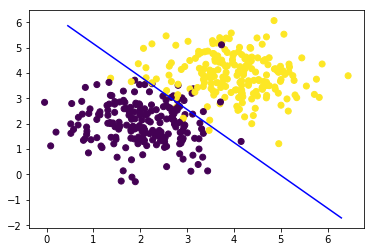

In [8]:
# take two random x coordinates, 
# based on minimum and maximum values of training data
xs = [np.random.normal(X.min(), 0.5), np.random.normal(X.max(), 0.5)]

# hence the equation of 'decision surface' is W1 * x + W0 * y = - w0, we can find y for every x
ys = [-(log_reg.w0 + log_reg.W[0] * x) / log_reg.W[1] for x in xs]

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(xs, ys, c='b');

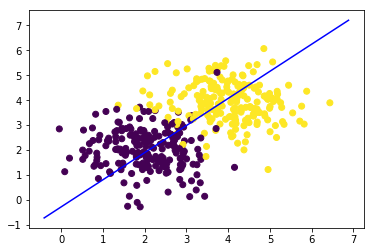

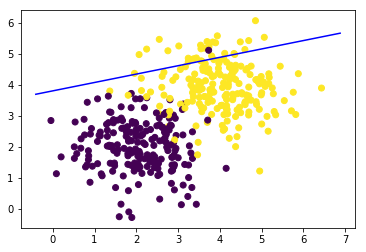

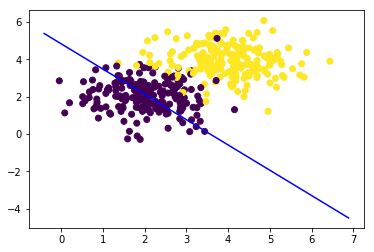

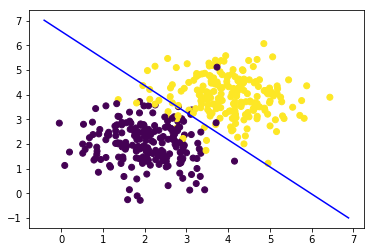

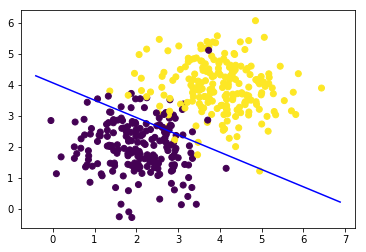

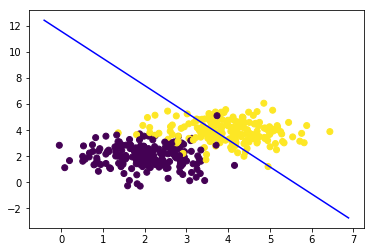

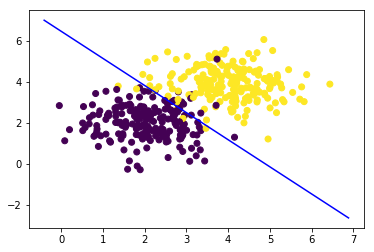

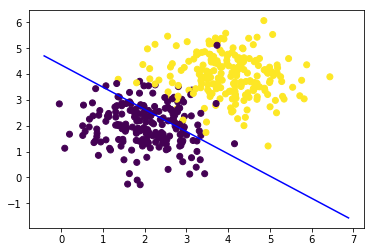

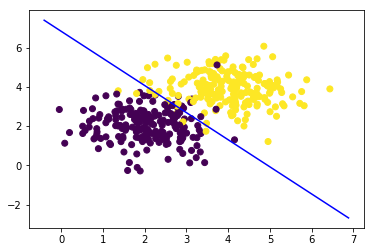

In [9]:
# progress

xs = [np.random.normal(X.min(), 0.5), np.random.normal(X.max(), 0.5)]

for weights, bias in tuple(zip(log_reg.weights, log_reg.biases))[::100]:
    ys = [-(bias + weights[0] * x) / weights[1] for x in xs]
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.plot(xs, ys, c='b')
    plt.show()